# Build a model to predict Tesla Stock price

## Problem Statement:
A lot of people are investing their money now instead of simply saving it. Investing is the process of buying something of value that will increase in its value over time, which then would provide us with a return of our investment along with additional profit. Stock trading is a type of investment practise that aims to increase immediate profits instead of long-term gains by buying stocks at low price and selling it at a higher price.

The goal of this challenge is to build a machine learning model that predicts the stock price of a company, in this case Tesla, and hence tell us when to buy/sell our stock holdings

Build a model to predict what the stock price of Tesla will be in the time span of the next few weeks.


## Dataset: 
The Dataset used in this project is taken from yahoo finance's historical data on TSLA from 1st July 2010 to 1st     October 2022. The data can be viewed on the yahoo finance website [here](https://finance.yahoo.com/quote/TSLA/history?period1=1277942400&period2=1664582400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

## Step 1: Import all the required libraries 

* __NumPy__ : NumPy is a Python library designed to manipulate arrays. It has built-in functions that can perform quick operations on arrays and matrixes, Very useful for linear algebra and machine learning. 

* __Pandas__ : Pandas is a Python library designed data manipulation and analysis using the numpy library. In particular, it offers data structures and functions for handling tables and time series
* __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
* __matplotlib__ :  Matplotlib is a python library built for eassy visualisation. It is built on NumPy arrays and consists of several plots like line, bar, scatter, histogram, etc.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2 : Read dataset and basic details of dataset


#### Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see if we need to create new column

In this stage we are going to read our problem dataset and have a look at it.

In [2]:
#loading training data
try:
    df = pd.read_csv('./data/TSLA.csv')
    print('Data loaded successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data loaded successfully...


We have read the data into _df_ , we can look at the first and last 5 rows using


In [3]:
#Print first 5 rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
1,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
3,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
4,2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000


In [4]:
#Print last 5 rows
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3080,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
3081,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200
3082,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800
3083,2022-09-29,282.760010,283.649994,265.779999,268.209991,268.209991,77620600
3084,2022-09-30,266.149994,275.570007,262.470001,265.250000,265.250000,67517800


Lets print the total rows and columns of the dataset


In [5]:
print(f"The above dataset has {df.shape[0]} rows and {df.shape[1]} columns") #df.shape return a tuple contining rows and column

The above dataset has 3085 rows and 7 columns


Lets learn a bit more about our dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3085 non-null   object 
 1   Open       3085 non-null   float64
 2   High       3085 non-null   float64
 3   Low        3085 non-null   float64
 4   Close      3085 non-null   float64
 5   Adj Close  3085 non-null   float64
 6   Volume     3085 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 168.8+ KB


The columns 'Open', 'High', 'Low', 'Close', 'Adj Close' are float type as they are they are the stock value(in dollars) upto two decimal places and the 'volume' column is int type representing the amount of stocks traded that day. However as we can see the 'Date' Column is of the wrong datatype _object_. 


We will convert the 'Date' column to the appropriate datatype

In [7]:
#Converting 'Date' from object dtype to datetime dtype
df['Date'] =  pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3085 non-null   datetime64[ns]
 1   Open       3085 non-null   float64       
 2   High       3085 non-null   float64       
 3   Low        3085 non-null   float64       
 4   Close      3085 non-null   float64       
 5   Adj Close  3085 non-null   float64       
 6   Volume     3085 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 168.8 KB


As we can see the 'Date' column has been successfully converted.

Luckily for us we don't have any null/missing values as can be seen from the info() method.

Lets see if there are any duplicates in our dataset

In [9]:
#Return True if there is even a single row that is duplicated, else returns False
df.duplicated().any()

False

Great! Our data seems to be clear of any missing values and duplicates. 

Since the dataset is incrementing by one day every row, we can only only train a model to predict the stock price at one days interval. Since the highs and the lows of a stock in a day are very spotaneous we will stick to the closing value, specifically the _Adjusted closing value_. 

But we have two columns for the closing value and since the 'close'and the 'adj close' are so near in value our model will be mostly predict based on the close column but that would essentially be cheating as the adjusted close value is based on close column. So to remove this we will drop the 'close' column and refer to 'adj close' as close from here on out

In [10]:
#Removing the 'close' column
df.drop(columns=['Close'], inplace=True)

#Renaming 'adj close' to 'close'
df.rename(columns= {'Adj Close': 'Close'}, inplace= True)

df.head()

,Date,Open,High,Low,Close,Volume
0,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
1,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
2,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500
3,2010-07-07,1.093333,1.108667,0.998667,1.053333,103825500
4,2010-07-08,1.076000,1.168000,1.038000,1.164000,115671000


### Step 2 Insights:- 

1. We have 3085 rows of data and 7 columns describing the various price points of the stock on a particular day

2. Convert the Date column to the datetime datatype
3. Our target variable will be the adj close column
4. Dropping the 'close' column and renaming 'adj close' to 'close'

## Step 3: Descriptive Analysis

Things we are going to do in this step: 

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Quantiles
11. Outliers
12. Skewness  

In [11]:
#Gives us a summary statistics of our data in a neat table
df.describe()

,Open,High,Low,Close,Volume
count,3085.000000,3085.000000,3085.000000,3085.000000,3.085000e+03
mean,56.195877,57.454007,54.836589,56.178882,9.326561e+07
std,94.618968,96.797763,92.203686,94.532481,8.221367e+07
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06
25%,8.298000,8.406000,8.012667,8.162000,4.171500e+07
50%,16.007334,16.265333,15.711333,16.016001,7.534650e+07
75%,23.661333,23.999332,23.333332,23.655333,1.172130e+08
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08


### Measures of central tendencies

Lets have a look at the mean, median and mode

#### 1.Mean
The mean is the arithmetic average of the data

In [12]:
#Printing the mean values 
df.mean(numeric_only=True) #Set numeric_only to True as taking the mean of Date doesn't make sense

Open      5.619588e+01
High      5.745401e+01
Low       5.483659e+01
Close     5.617888e+01
Volume    9.326561e+07
dtype: float64

Lets group by year and month to get more intimate details about our stock

In [13]:
ydf = [l.year for l in df['Date']]#Creating a list of all the years
mdf = [l.month for l in df['Date']]#Creating a list of all the months

df_year = df.groupby(ydf).mean() #Grouping by year
df_month_and_year = df.groupby([ydf,mdf]).mean()#Grouping by year and month

Looking at numbers by themself doesn't make sense to us so lets try to visualize it

<AxesSubplot:>

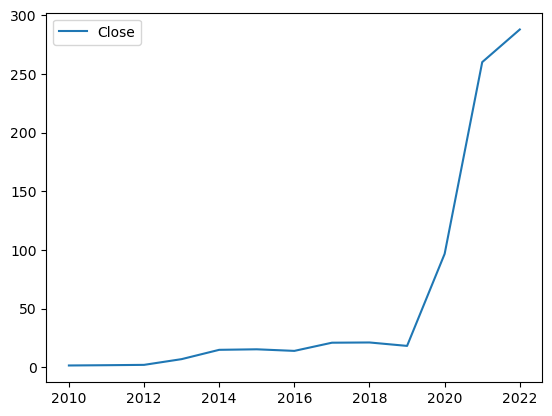

In [14]:
#Plotting a line plot using built in method plot() of pandas, to make sense of data
df_year.plot( y='Close')

We can see how the mean close price changes over the year. But it would be nice to see how it changes every year.

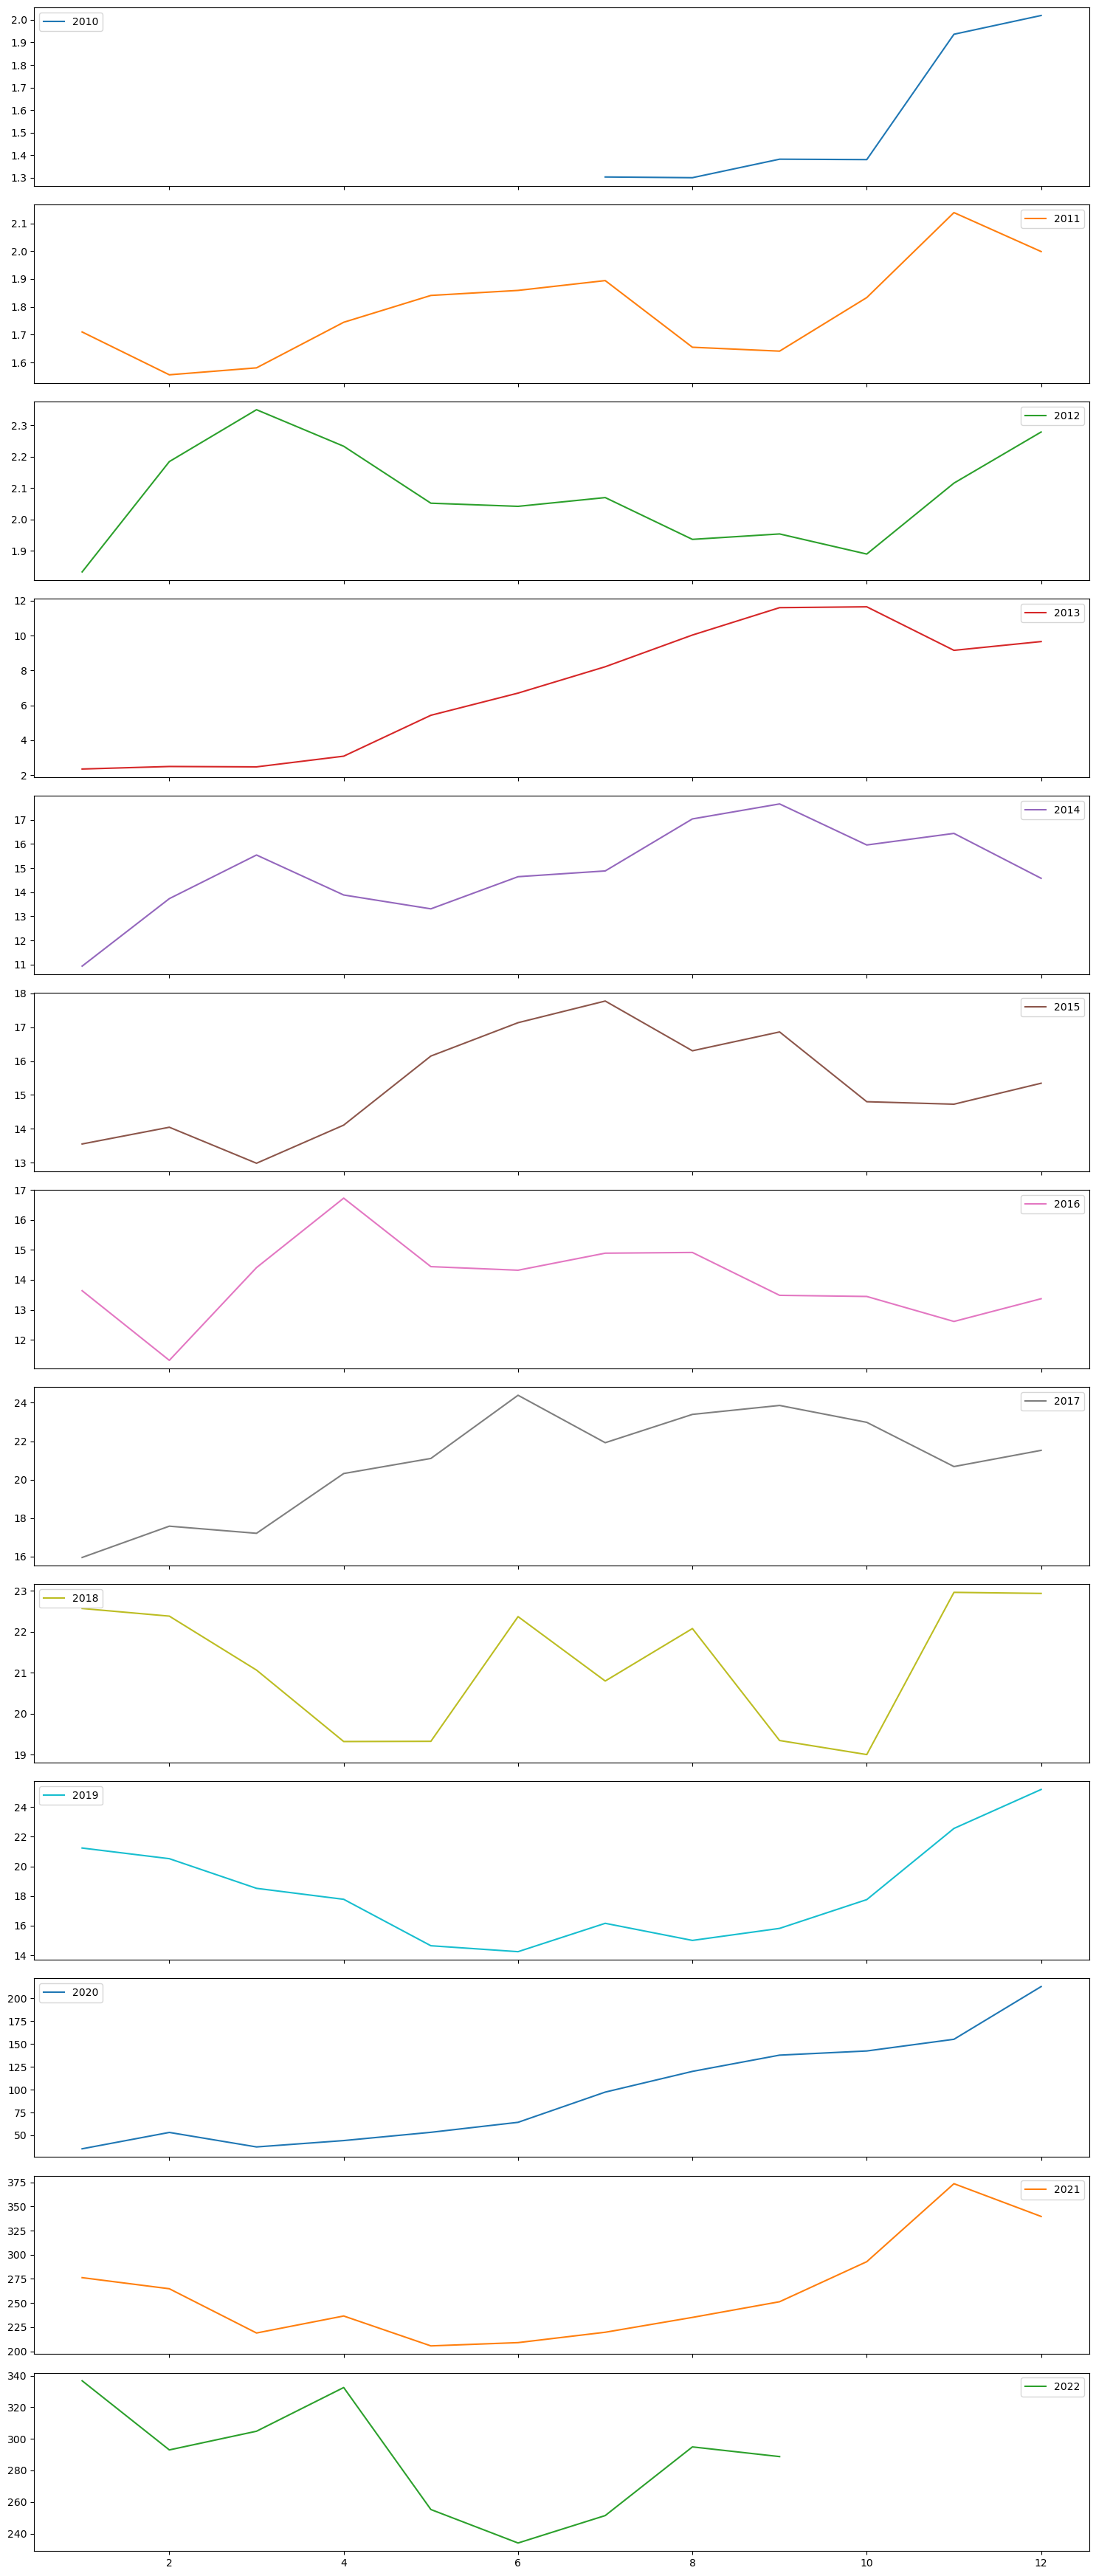

In [15]:
#Since our data is multi-index after groupby we unstack it to make it a single index DataFrame, so we can pass it to the plot() method.
ax = df_month_and_year.unstack(level=0).loc[:,'Close'].plot(kind='line', subplots=True, rot=0,figsize=(15,35))#Setting subplot to True so it makes different charts
plt.tight_layout()


We can see that in total for 9 years the Tesla **stock has risen in value near the end of the year**, and it has done so consecutively from 2015 - 2020.
And in general the stock doesn't do as great as the beginning or the end of the year. This is not enough to prove some relation but its a start.

Lets also look at the mean volume of stocks traded over the years


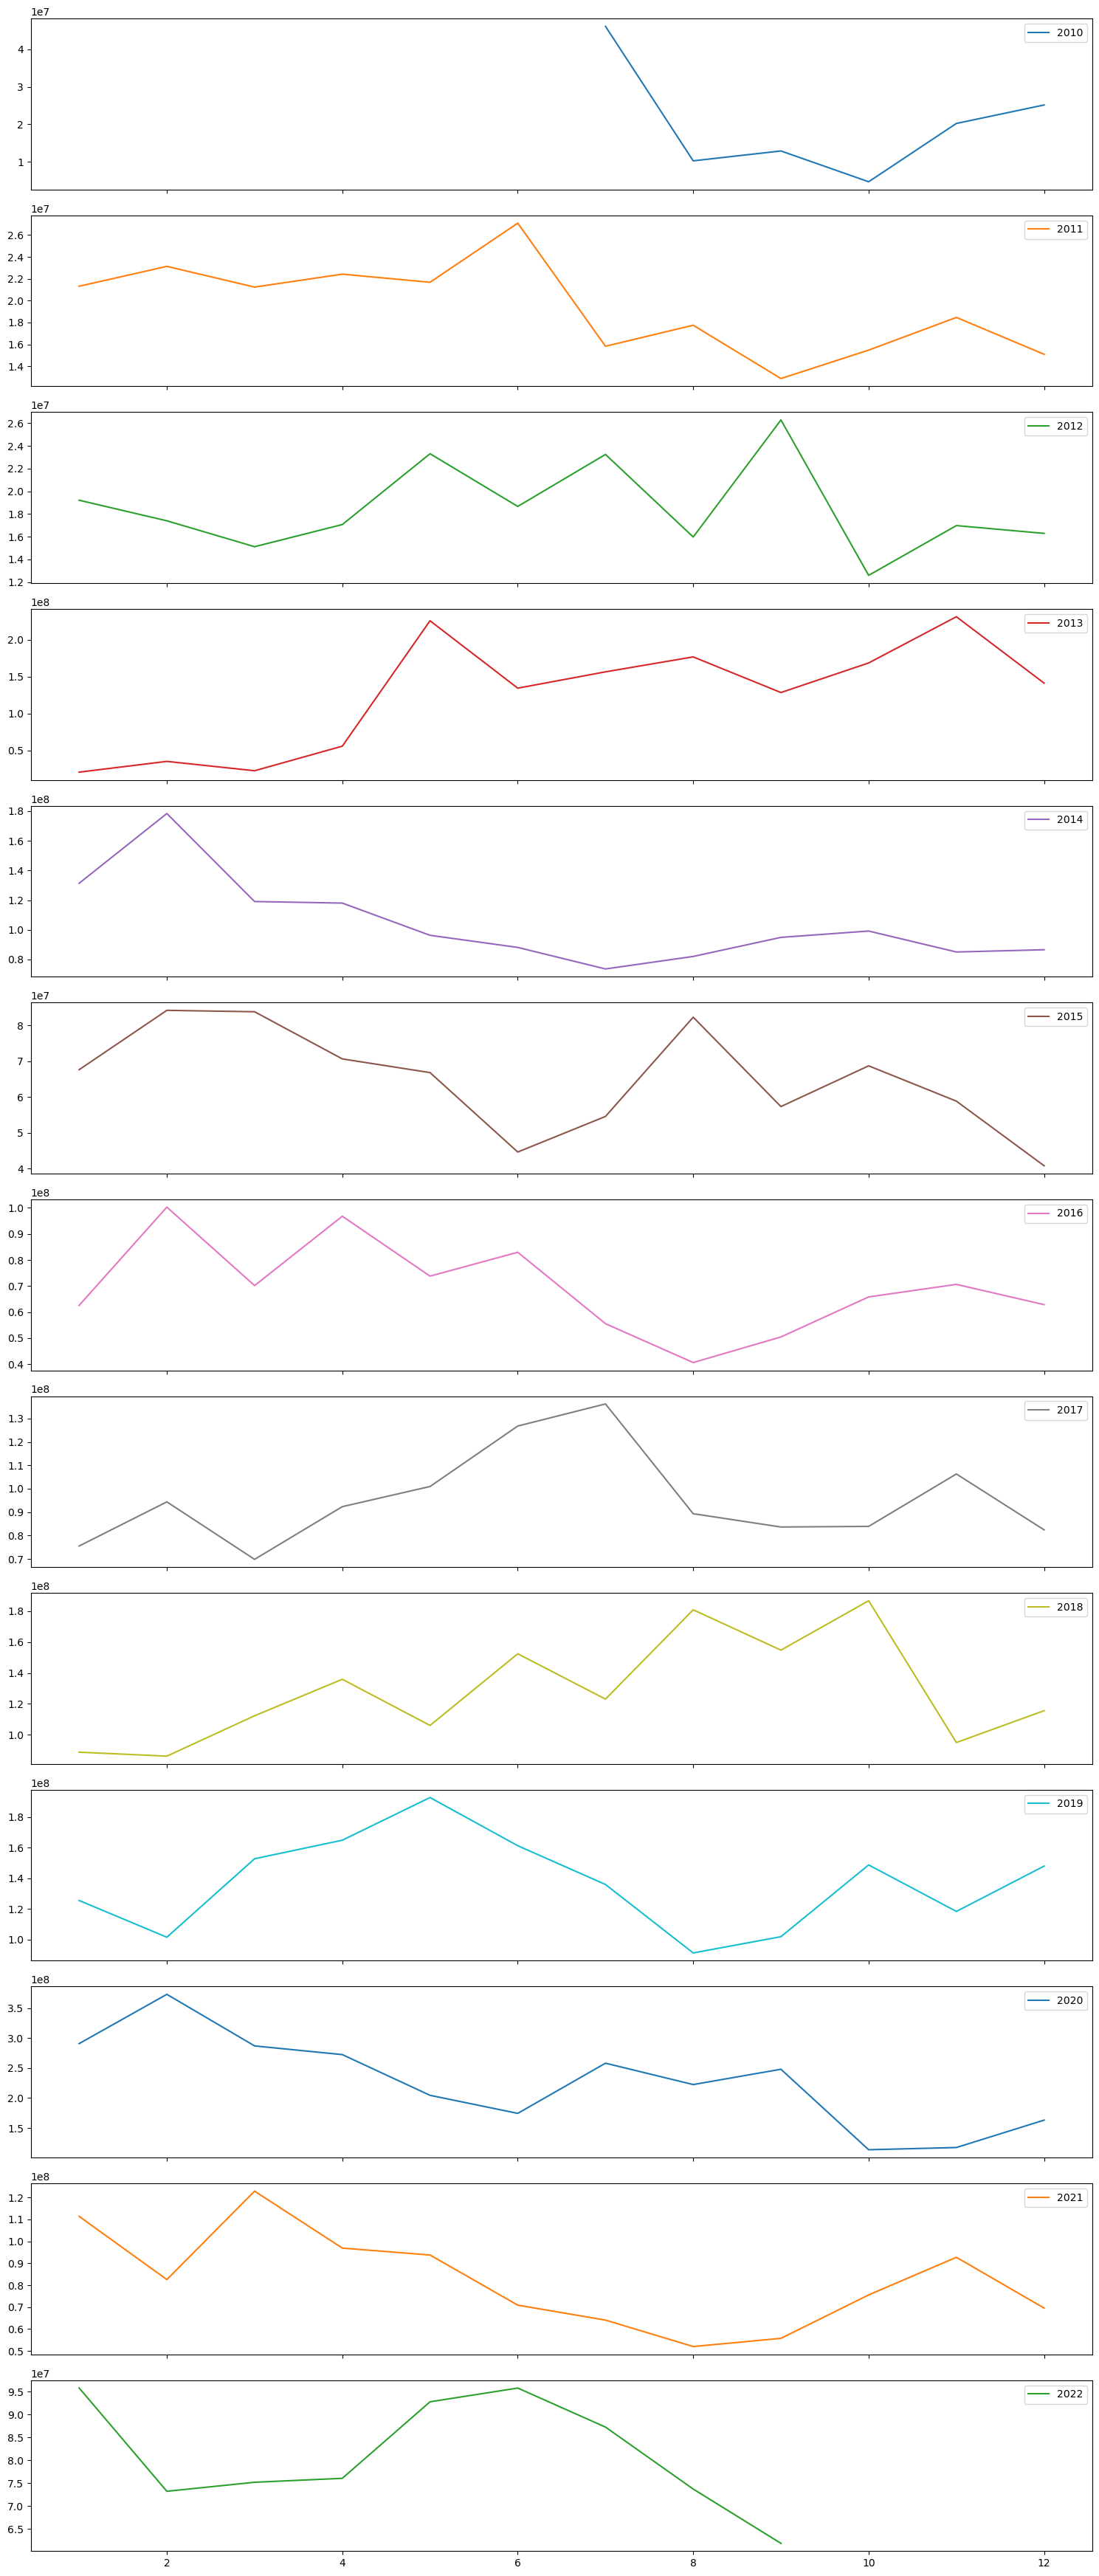

In [16]:
#Since our data is multi-index after groupby we unstack it to make it a single index DataFrame, so we can pass it to the plot() method.
ax = df_month_and_year.unstack(level=0).loc[:,'Volume'].plot(kind='line', subplots=True, rot=0,figsize=(15,35))
plt.tight_layout()

We can't really infer a lot from this but it would seem a **lot of stocks are traded at the start of every year**, this could explain why the stock value falls near the middle of the year, as trading a lot of stock would increase the supply but the demand remains same hence decreasing the price. But we can't say for sure

#### 2. Median
The median is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution. For a data set, it may be thought of as "the middle" value.

In [17]:
#Printing the median values
df.median(numeric_only=True) #again ignoring date as a median of dates is of no use to us

Open      1.600733e+01
High      1.626533e+01
Low       1.571133e+01
Close     1.601600e+01
Volume    7.534650e+07
dtype: float64

We'll do the same thing as mean and look at it year-wise and month-wise

In [18]:
df_year_median = df.groupby(ydf).median() #Grouping by year
df_month_and_year_median = df.groupby([ydf,mdf]).median()#Grouping by year and month

In [19]:
#Printing median values of every year
df_year_median

,Open,High,Low,Close,Volume
2010,1.399334,1.424333,1.367000,1.395334,11136000.0
2011,1.799000,1.840000,1.750666,1.793333,15369750.0
2012,2.071000,2.118000,2.036333,2.077333,15053250.0
2013,7.718333,7.984333,7.215000,7.747333,112938750.0
2014,15.008667,15.310667,14.748000,14.981000,89650500.0
2015,15.349000,15.554333,15.056334,15.360333,57273750.0
2016,13.940000,14.193334,13.735000,13.913667,60830250.0
2017,21.152000,21.466000,20.876667,21.170000,85084500.0
2018,21.160000,21.590000,20.780666,21.257999,108021000.0
2019,17.328665,17.598667,17.088999,17.353001,116165250.0


In [20]:
#Printing the median of the first 5 months
df_month_and_year_median.head()

Open      High       Low     Close      Volume
2010 7   1.370000  1.393333  1.303333  1.348000  37297500.0
     8   1.308000  1.322000  1.265000  1.302334  10230750.0
     9   1.391333  1.416000  1.366667  1.381333   9820500.0
     10  1.378667  1.395333  1.357333  1.376667   4270500.0
     11  2.010667  2.049333  1.894667  1.978000  17257500.0

In [21]:
#Printing the median of the last 5 months
df_month_and_year_median.tail()

Open        High         Low       Close      Volume
2022 5  255.720001  256.586670  242.399994  252.753326  89295000.0
     6  235.156662  243.576660  230.093338  235.070007  95770800.0
     7  244.968330  250.589996  238.290001  245.036667  84652050.0
     8  297.429993  302.959991  289.086670  296.453339  70155000.0
     9  283.839996  289.500000  279.760010  288.589996  61642800.0

There are no zero or constant values for medians, there is a **steady increase** in the median over the years, so we can say that the stock is a really good pick for long-term gains.

#### 3. Mode
Mode refers to the value in the dataset that occurs the most number of times, if there are multiple such values then the data is multimodal. And if there are no such value then the data is said to have no mode.

In [22]:
#Printing the mode of every column
df.mode(numeric_only=True)

,Open,High,Low,Close,Volume
0,1.866667,1.866667,1.820000,1.828,9922500
1,2.000000,2.000000,1.866667,NaN,10117500
2,NaN,2.300000,NaN,NaN,10935000
3,NaN,NaN,NaN,NaN,10939500
4,NaN,NaN,NaN,NaN,13837500
5,NaN,NaN,NaN,NaN,14305500
6,NaN,NaN,NaN,NaN,14346000
7,NaN,NaN,NaN,NaN,14794500
8,NaN,NaN,NaN,NaN,14814000
9,NaN,NaN,NaN,NaN,14995500


No zero values for mode, and our data is multimodal as it has 30 modes for volume, 1 for close, 2 for low, 3 for high, 2 for open. Nothing remarkable at all.

### Measures of variations

Measures of variation are a way of showing how the data is distributed, lets take a look at our data's variations.

#### 4. Standard Devition

Standard deviation in statistics refers to the amount with which the data _deviates_ from the mean. In other words how far from mean the data is. A __Low__ standard deviation means that the data points are closer to the mean, a __High__ standard deviation means that the data points are farther from the mean, in essence spread out. Standard deviation is often referred to as _sd_

In [23]:
#printing the standard deviations of every column
df.std(numeric_only=True)#ignoring dates

Open      9.461897e+01
High      9.679776e+01
Low       9.220369e+01
Close     9.453248e+01
Volume    8.221367e+07
dtype: float64

A sd of __90+__! That's a lot of deviation. The sd is high for 'Volume' too, but thats understandable as the amount of stock traded would obviously change as the stock gets more and more popular.
<br>Lets take a year-wise and month wise look at the data.

In [24]:
df_year_std = df.groupby(ydf).mean() #Grouping by year
df_month_and_year_std = df.groupby([ydf,mdf]).mean()#Grouping by year and month

In [25]:
#Printing the standard deviation for every year
df_year_std

,Open,High,Low,Close,Volume
2010,1.561589,1.601365,1.512057,1.555583,1.985340e+07
2011,1.788132,1.825349,1.746278,1.786984,1.935923e+07
2012,2.080208,2.120611,2.036392,2.077907,1.844694e+07
2013,6.961095,7.123534,6.785325,6.960082,1.261158e+08
2014,14.894360,15.163325,14.613741,14.888606,1.037096e+08
2015,15.322130,15.558778,15.084709,15.336193,6.477487e+07
2016,14.003897,14.228899,13.752410,13.984484,6.918820e+07
2017,20.953081,21.230040,20.645798,20.954420,9.502180e+07
2018,21.145564,21.579575,20.703487,21.153995,1.291816e+08
2019,18.201876,18.509987,17.907503,18.235347,1.373838e+08


In [26]:
#Printing the standard deviation for first 10 months
df_month_and_year_std.head(10)

Open      High       Low     Close        Volume
2010 7   1.338222  1.376000  1.254413  1.303873  4.612557e+07
     8   1.303030  1.327333  1.272030  1.300727  1.025332e+07
     9   1.385270  1.418413  1.353937  1.382698  1.288993e+07
     10  1.381556  1.399524  1.361714  1.380889  4.677000e+06
     11  1.905810  1.991333  1.848571  1.936127  2.022507e+07
     12  2.044939  2.085576  1.971242  2.019242  2.515425e+07
2011 1   1.720500  1.745267  1.675967  1.709533  2.131508e+07
     2   1.559684  1.592456  1.522000  1.555579  2.313434e+07
     3   1.576058  1.604638  1.548696  1.580580  2.123693e+07
     4   1.752633  1.781567  1.709300  1.744400  2.242118e+07

In [27]:
#Printing the standard deviation for last 15 months
df_month_and_year_std.tail(15)

Open        High         Low       Close        Volume
2021 7   219.840952  223.639840  215.680000  219.711588  6.406426e+07
     8   234.811213  238.180455  231.886364  235.081062  5.199885e+07
     9   250.604284  253.858096  247.543493  251.317463  5.573876e+07
     10  289.953491  296.909206  287.247936  292.783017  7.556209e+07
     11  372.588890  382.863017  362.036666  373.554125  9.273021e+07
     12  341.477726  348.253938  330.886665  339.629999  6.955308e+07
2022 1   339.770000  349.012334  326.520500  336.722830  9.580032e+07
     2   292.789474  301.286843  284.898768  292.961577  7.321719e+07
     3   303.253333  311.332608  296.599713  304.793186  7.518578e+07
     4   337.054169  344.035336  325.974168  332.462503  7.604799e+07
     5   256.985554  264.414288  246.076190  255.223334  9.277246e+07
     6   234.472539  241.544444  228.351111  234.025873  9.577276e+07
     7   248.886668  255.841666  243.754666  251.394666  8.724420e+07
     8   297.223042  301.852028  290.238551  294.869857  7.370710e+07
     9   287.885710  294.027140  282.823809  288.734763  6.184062e+07

So it seems that the sd was low initially, which makes sense, but overtime it becomes more and more. This is logical as there is a change in the price of almost any stock overtime, however the sd for recent years is above __200__ meaning that the stock of Tesla has exploded in popularity and value, compared to its starting days. This also means that the **stock is volatile**. High risk high reward

#### 5. Variance

Variance is essentially the amount of dispersion of dataset from mean, its very similiar to sd and is literally the square of sd

In [28]:
#Printing the variance of every column
df.var(numeric_only=True)#ignore dates

Open      8.952749e+03
High      9.369807e+03
Low       8.501520e+03
Close     8.936390e+03
Volume    6.759088e+15
dtype: float64

The units of variance are blown out naturally as it is just the square of sd. Upon looking at the variance we can infer the same things as that from sd

### Missing values

Datasets are usually incomplete, meaning there are gaps in the dataset. This can be caused due to a lot of reasons. Like the data was missing at source or it was not properly recorded, or it was wrongly entered, lost during processing, lost due to hardware failure, etc. Most common of these issues is the issue of missing values. They can negatively affect our model and analysis. Therefore they must be taken care of.

#### 6. Null values
Lets check if there exists any null values in any column(including dates)

In [29]:
#Return True if there is a ingle null value
df.isnull().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

It seems our data is clear of _null_ values

#### 7. NaN values
Lets check if there exists any NaN values in any column(including dates)

In [30]:
#Return True if there is a ingle NaN value
df.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

Great! Our data is squeaky clean, no need to worry about missing values influencing our model.

### Outline of our data
Let's see the extremes and range of our data

#### 8. Minimum values
These are the lowest values in our dataset

In [31]:
#Printing the minimum value in every column
df.min()

Date      2010-07-01 00:00:00
Open                    1.076
High                 1.108667
Low                  0.998667
Close                1.053333
Volume                1777500
dtype: object

#### 9. Maximum values
These are the Highest values in our dataset

In [32]:
#Printing the maximum value in every column
df.max()

Date      2022-09-30 00:00:00
Open               411.470001
High               414.496674
Low                405.666656
Close              409.970001
Volume              914082000
dtype: object

This further confirms our hypothesis that this is a very volatile stock. As we can see the minimum closing value has gone __below__ the minimum opening value. Meaning that the stock of Tesla has gone down even __below their Initial Public Offering__. At the same time the max closing value has been __80 times__ the average closing value.

#### 10. Quantiles
This divides our data into ranges. We will look at the 25th and 75th quartile. Min is 0th Mean is 50th and Max is 100th

##### 25th Quartile
This is at the first quarter of our data

In [33]:
#Printing the 25th quantile
df.quantile(q=0.25)

Open      8.298000e+00
High      8.406000e+00
Low       8.012667e+00
Close     8.162000e+00
Volume    4.171500e+07
Name: 0.25, dtype: float64

##### 75th Quartile
This is at 3 quarters of our data

In [34]:
#Printing the 75th quantile
df.quantile(q=0.75)

Open      2.366133e+01
High      2.399933e+01
Low       2.333333e+01
Close     2.365533e+01
Volume    1.172130e+08
Name: 0.75, dtype: float64

It looks like the most growth has been done after the 75th quartile. Basically the stock price has increased eponentially after the 75th quartile

#### 11. Outliers
Outliers refer to the datapoints that are extremely hiigh or low, these could affect our model. 
Lets make a scatter plot to see if any datapoints standout.

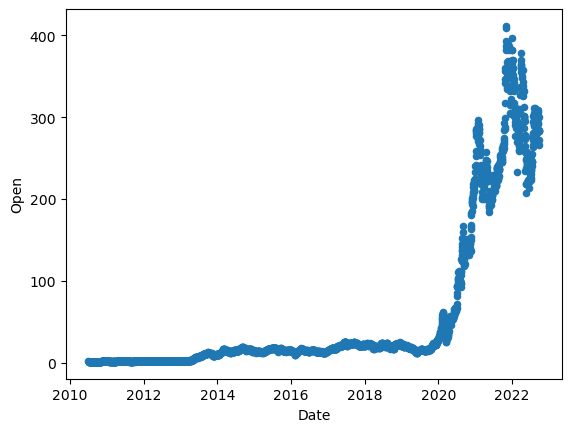

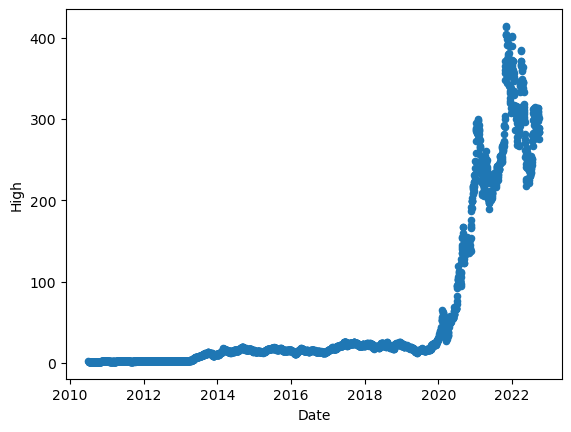

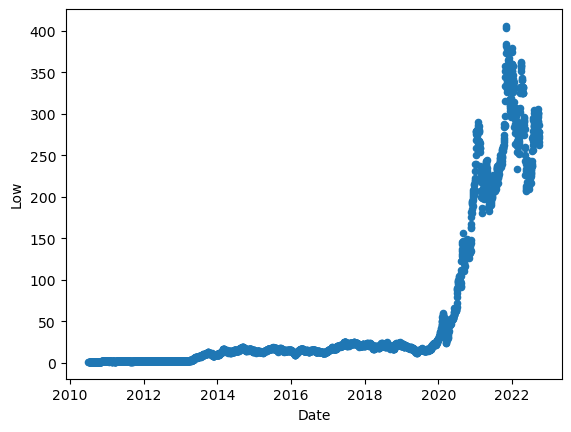

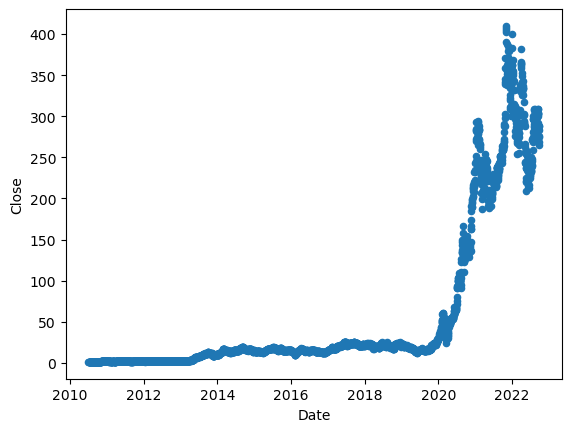

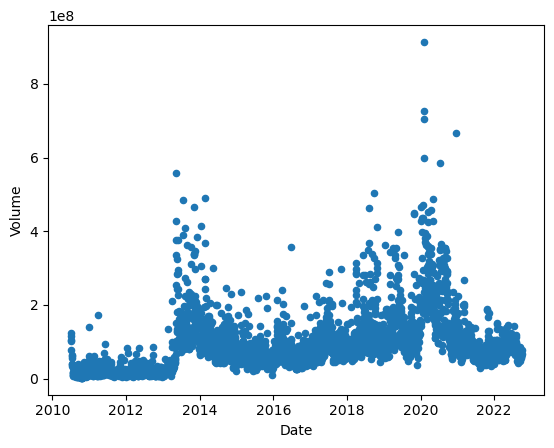

In [35]:
#Creating a scatter plot for every column against the 'Date' column
for col in df.columns[1:]:
    df.plot(x='Date',y= col ,kind='scatter')

There are not a __lot__ of extreme values, some values go above the mean but they can be ignored, there are a **few outliers** in the volume column but they **can be ignored** as it won't affect our model much.

#### Skewness of Data
Skewness is a measure of the asymmetry or skewness of a symmetric distribution. It measures the deviation of a particular distribution of random variables from a symmetric distribution, such as the normal distribution. The normal distribution is symmetric on both sides, so it is not skewed.

In [36]:
#Printing the skewness of every column
df.skew(numeric_only=True)

Open      1.957541
High      1.956980
Low       1.955029
Close     1.954669
Volume    2.385816
dtype: float64

From above values we an see that all our columns are **positively skewed**. This simply means that the values in the higher range occur less frequently compared to others.

### Step 3 Insights

From the statistical analysis above we find that:
1. The stock price rises near the end of the year

2. The stock doesn't perform well mid-year
3. A lot of stock is traded at start of every year
4. The stock is good for long-term gains
5. The stock has exploded in value and popularity recently
6. The stock is fluctuating a lot in value
7. A few possible outliers but nothing concerning
8. There are more low data values compared to high data values

## Step 4: Data Exploration


### Goal/Purpose:- 

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns
5. Lineplot to see any patterns
6. Scatter plot to see any relation between date and volume

### 1. Histogram

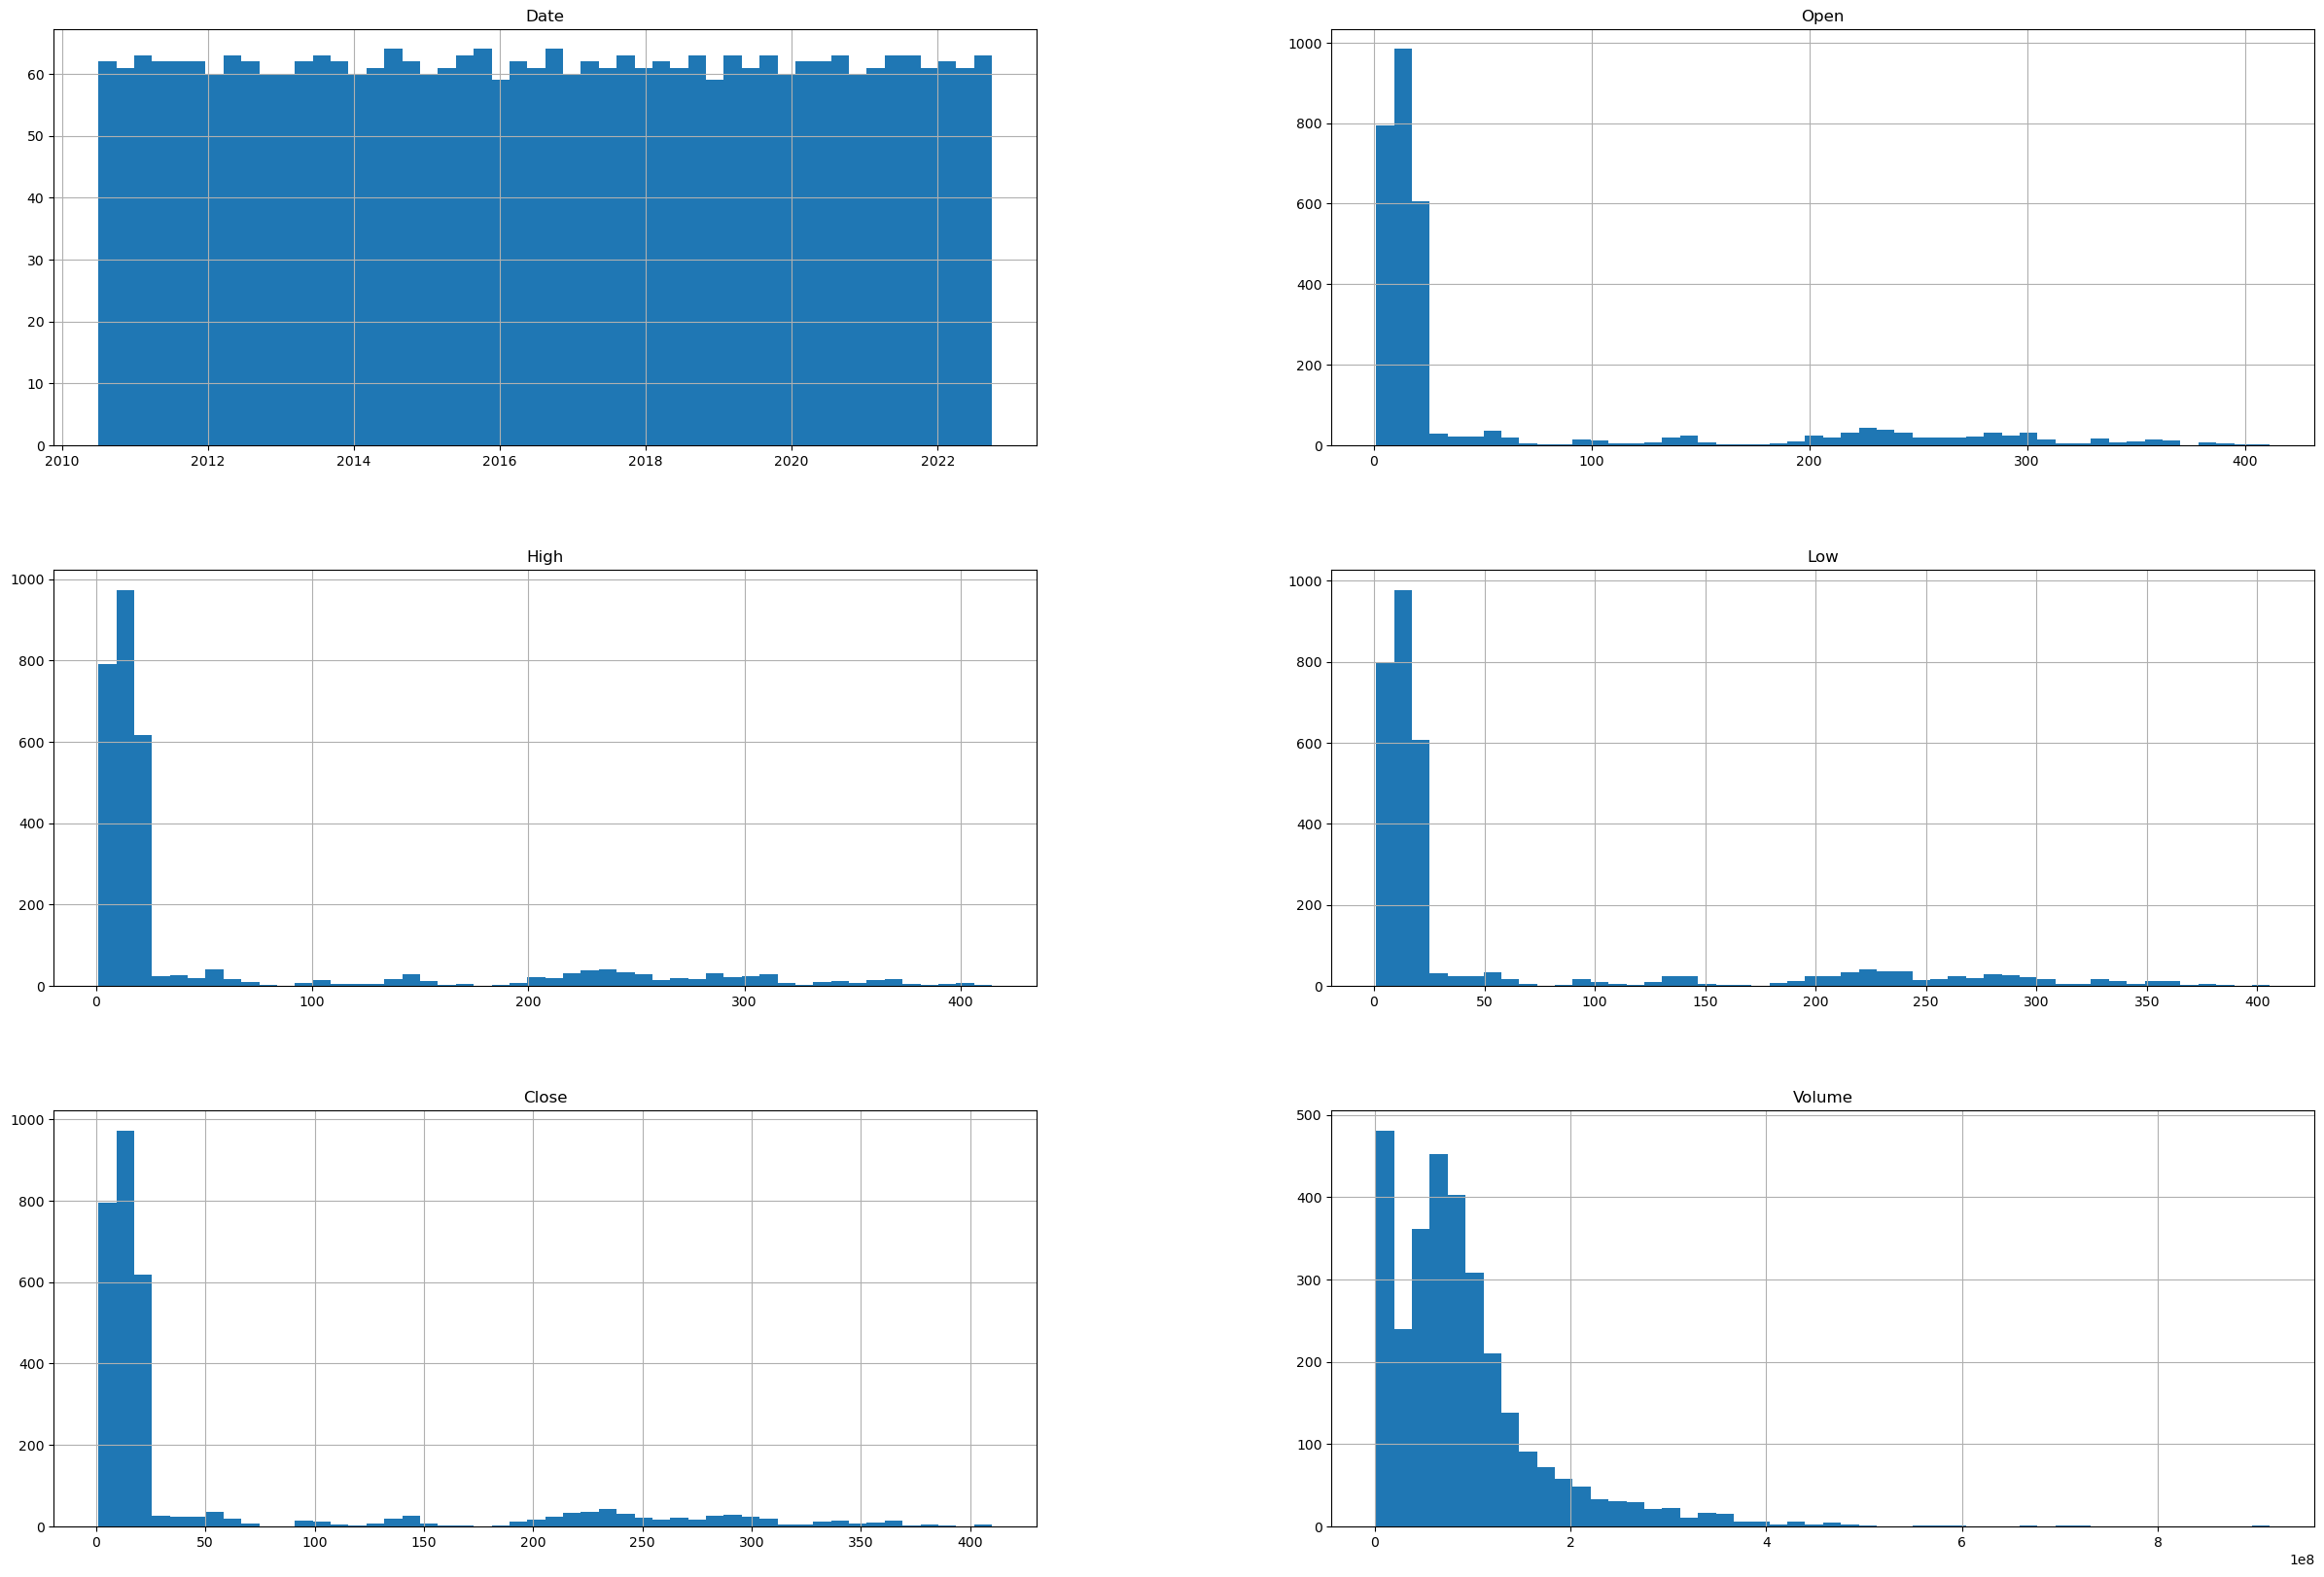

In [37]:
#Plotting Histograms of each column
%matplotlib inline
df.hist(bins=50, figsize=(30,20))
plt.show()

### 2. Distplot

/mnt/f6949ea6-23f5-4c75-bca3-14668f4f4d8f/zed/DS/conda/envs/learn/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/mnt/f6949ea6-23f5-4c75-bca3-14668f4f4d8f/zed/DS/conda/envs/learn/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/mnt/f6949ea6-23f5-4c75-bca3-14668f4f4d8f/zed/DS/conda/envs/learn/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be 

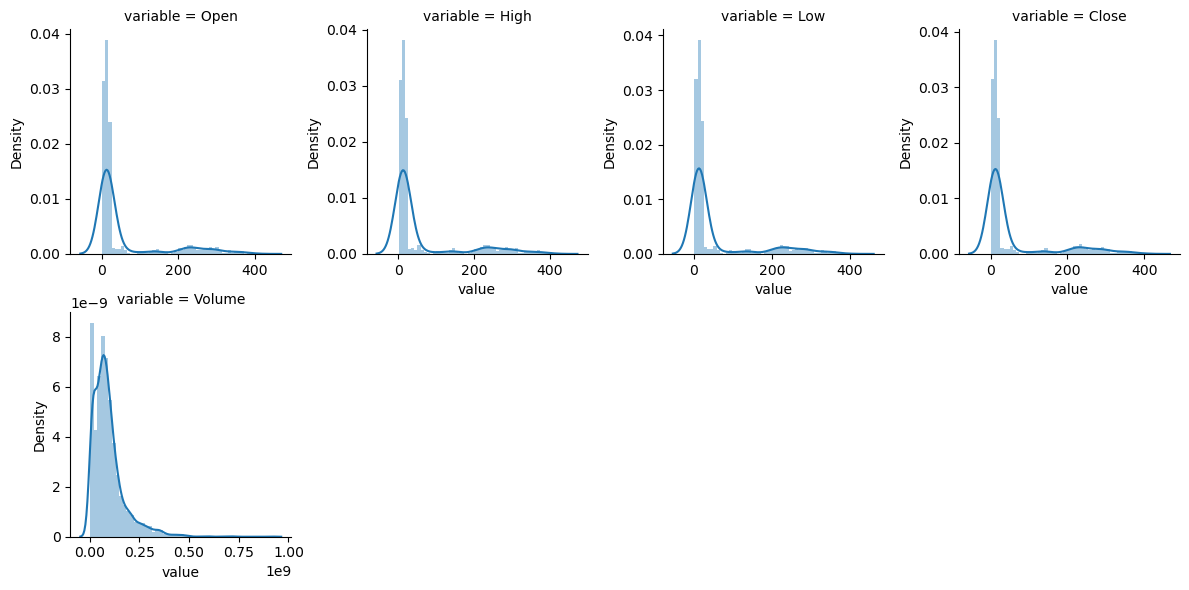

In [38]:
cols = [col for col in df.columns if col !='Date' ]#Selecting every column except 'Date' to plot
df1 = pd.melt(df, value_vars = cols) #Reshaping the DataFrame to match the input form of plotting function
#Plotting Distribution plots using seaborn
plot = sns.FacetGrid (df1, col='variable', col_wrap=4, sharex=False, sharey = False)
plot = plot.map(sns.distplot, 'value')
plot

We have drawn distribution bar graphs to confirm about statistical analysis of the data that we got, our data is skewed, so here also we notice from the graphs above:<br>
__All the columns are positively skewed__
One very interesting thing you may also notice is that the distribution of 'Open', 'High', 'Low', and 'Close' is very similiar, this clearly means there is a pattern here.

Lets have a closer look at our target variable's distribution

/mnt/f6949ea6-23f5-4c75-bca3-14668f4f4d8f/zed/DS/conda/envs/learn/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


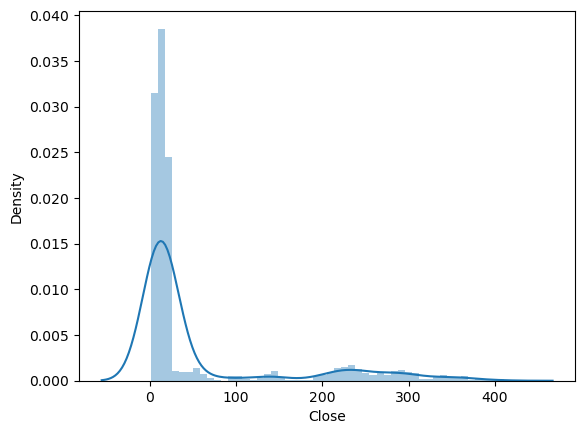

In [39]:
sns.distplot(df['Close'])
plt.show()

### 3. Heatmap

#### Correlation
Correlation is a statistical measure of how linearly two variables are related (that is, do they change at a constant rate). This is a general tool for describing simple relationships without stating cause and effect.
<br><br>
A correlation of __1__ means __Positive__ correlation<br>
A correlation of __0__ means __No__ correlation<br>
A correlation of __-1__ means __Negative__ correlation<br>

In [40]:
#printing the correlation among each column
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999734,0.999610,0.999229,0.060033
High,0.999734,1.000000,0.999613,0.999648,0.063563
Low,0.999610,0.999613,1.000000,0.999684,0.056470
Close,0.999229,0.999648,0.999684,1.000000,0.060793
Volume,0.060033,0.063563,0.056470,0.060793,1.000000


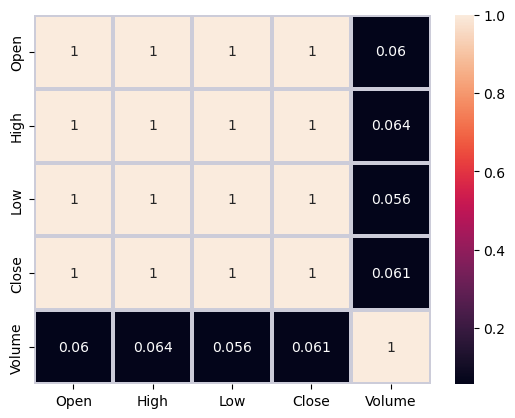

In [41]:
#Plotting a heatmap for the above correlation matrix
sns.heatmap(df.corr(), annot=True, linewidths=1.5, linecolor='#CCCCD9')
plt.show()

We will remove columns with high correlation a they add no extra value to the model but only increase the complexity of the model and create more ways for our system to make errors

### 4. Boxplot

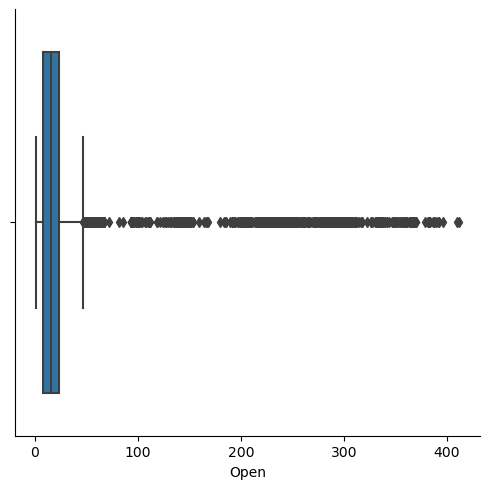

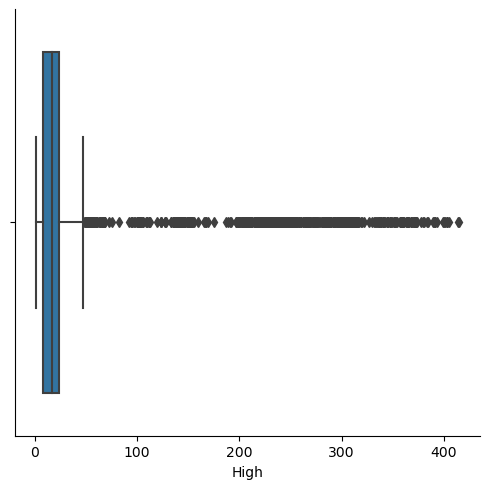

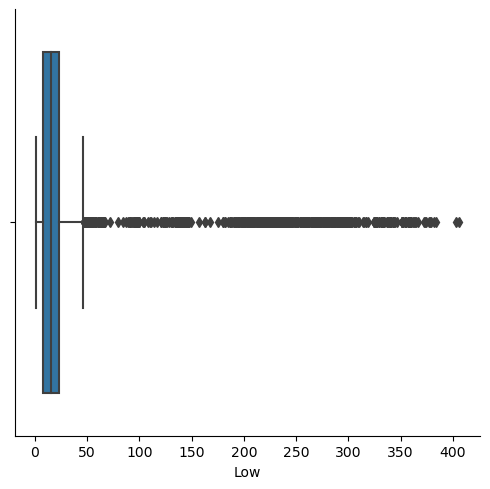

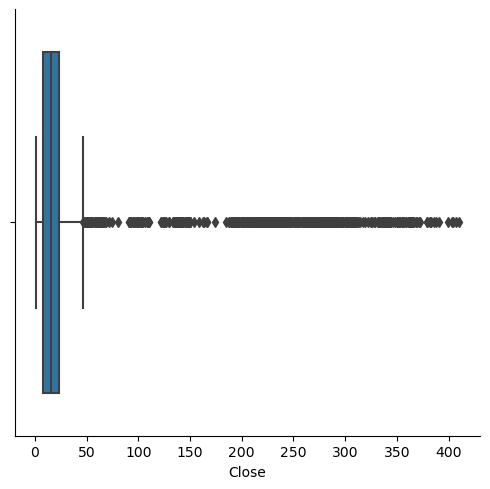

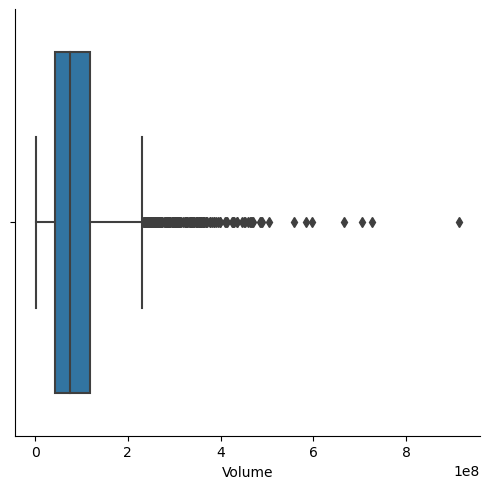

In [42]:
#Plotting a Boxplot for every feature except Date as date has all unique values
for value in df.columns[1:]:
    sns.catplot(data=df, x=value, kind="box")
    
plt.show()

### 5. LinePlot

Text(0.5, 1.0, 'High and Low Stock Prices for Tesla')

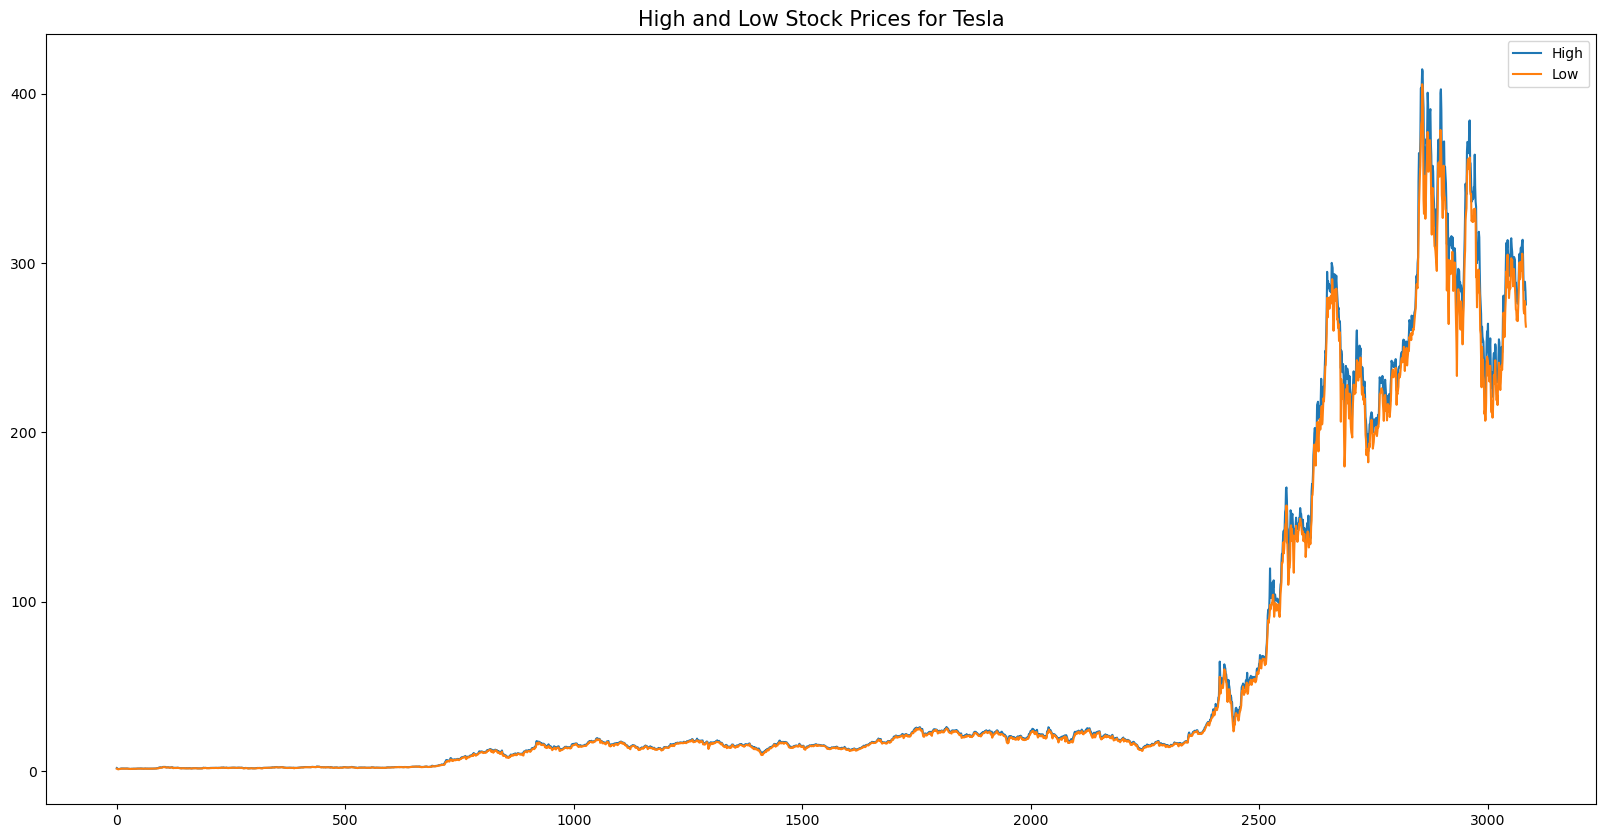

In [43]:
#Plotting a lineplot for high and low column
plt.figure(figsize = (20,10))#setting figure size using matplotlib
plt.plot(df['High'])#plotting a line plot for 'high'
plt.plot(df['Low'])#plotting a line plot for 'low'
plt.legend(['High','Low'])#Marking lines with label

plt.title('High and Low Stock Prices for Tesla', fontsize = 15)#Giving a title to the plot

Text(0.5, 1.0, 'Volume of stocks traded ')

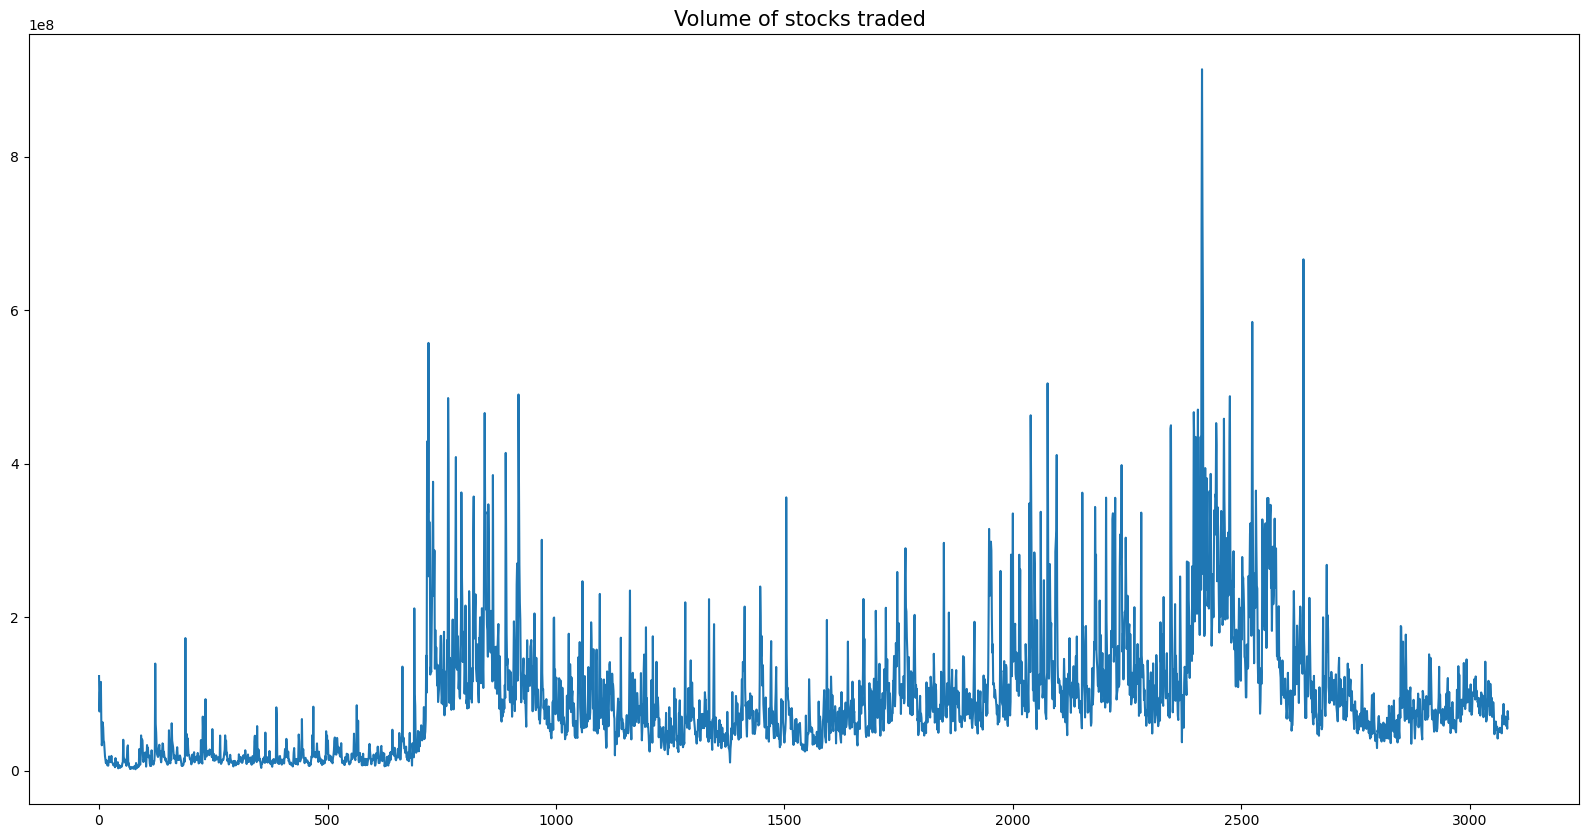

In [44]:
#Creating a Lineplot for the volume feature
plt.figure(figsize = (20,10))#setting figure size using matplotlib
plt.plot(df['Volume'])#plotting a line plot for 'Volume'

plt.title('Volume of stocks traded ', fontsize = 15)#Giving a title to the plot

### 6. Scatter Plot

Text(0.5, 1.0, 'The relation between  Date of Volume')

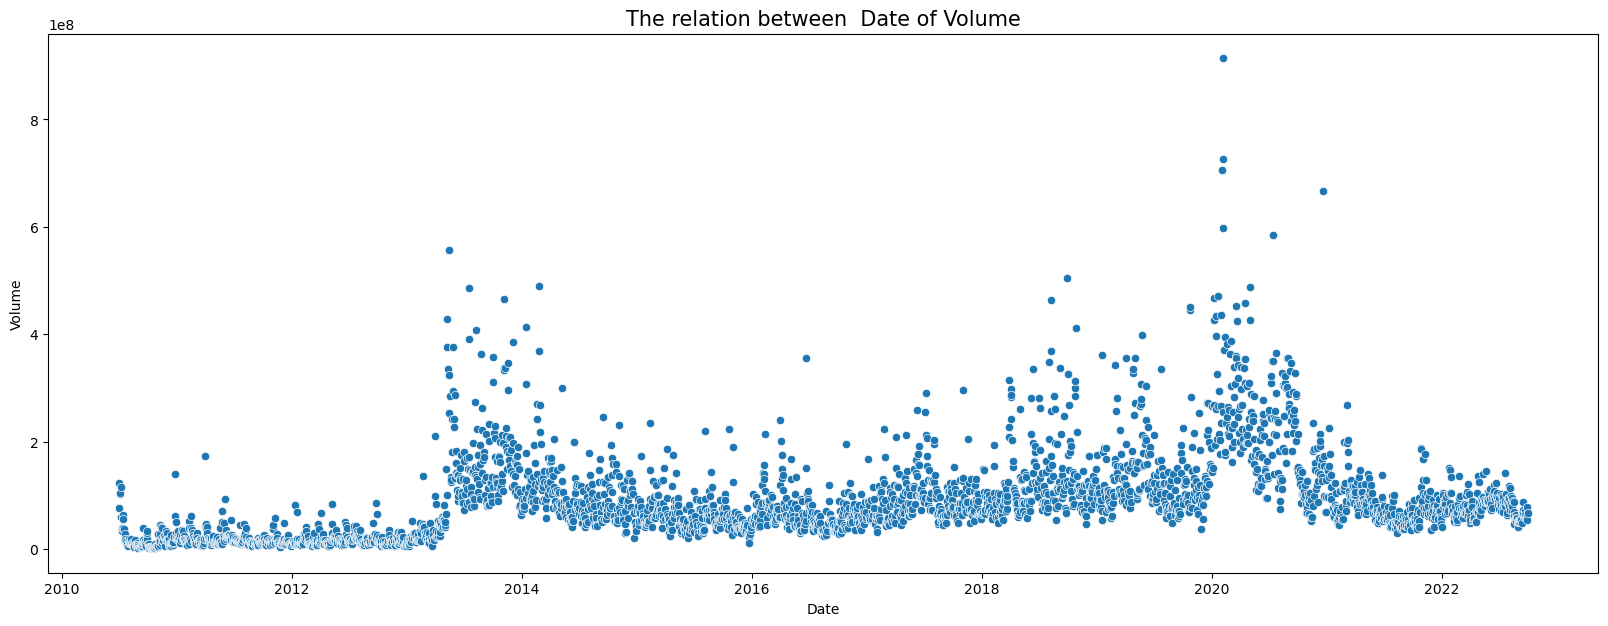

In [45]:
#Creating a Scatter Plot to see any relation between 'Date' and 'Volume' feature
plt.figure(figsize=(20,7))#setting figure size using matplotlib
sns.scatterplot(data=df,x="Date",y="Volume",)#Plotting a scatter plot of 'date' against 'volume'

plt.title("The relation between  Date of Volume", fontsize= 15)#giving title to the plot

Absolutely random, no spikes or trough to identify a pattern. It just reassures that there is little to no correlation between Volume and Dates as inferred from the heatmap.

### Step 4 Insights:

A lot of what we did is visually confirm the inferences made in step 3(Descriptive analysis). We also find that almost all the columns are completely positively correlated, execept volume. So now we know what columns to keep and what to drop

## Step 5: Data Preprocessing
In this stage we will prepare the data for our model to train on.

Lets drop the highly correlated columns. And only keep the 'Open' column, because it makes sense that we will know the 'Open' amount. We will keep the 'Volume' column as it is not correlated to 'Close'

In [46]:
#Droppin 'high' and 'low' columns
df.drop(['High', 'Low'],axis=1, inplace=True)

In [47]:
df.head()

,Date,Open,Close,Volume
0,2010-07-01,1.666667,1.464000,123282000
1,2010-07-02,1.533333,1.280000,77097000
2,2010-07-06,1.333333,1.074000,103003500
3,2010-07-07,1.093333,1.053333,103825500
4,2010-07-08,1.076000,1.164000,115671000


Now we have one last problem, the close value in one row depicts the close value for the same day, however we want to predict the close value of the next day. Let's create a new column called 'target' which will be our target variable and give it the close value of next day, in essence shift the data up by one row.

In [48]:
#Adding a new column called target with all its values shifted up by one
df['Target'] = df.Close.shift(periods=-1)

In [49]:
#Checking new dataframe
df.head()

,Date,Open,Close,Volume,Target
0,2010-07-01,1.666667,1.464000,123282000,1.280000
1,2010-07-02,1.533333,1.280000,77097000,1.074000
2,2010-07-06,1.333333,1.074000,103003500,1.053333
3,2010-07-07,1.093333,1.053333,103825500,1.164000
4,2010-07-08,1.076000,1.164000,115671000,1.160000


In [50]:
#Checking new dataframe
df.tail()

,Date,Open,Close,Volume,Target
3080,2022-09-26,271.829987,276.010010,58076900,282.940002
3081,2022-09-27,283.839996,282.940002,61925200,287.809998
3082,2022-09-28,283.079987,287.809998,54664800,268.209991
3083,2022-09-29,282.760010,268.209991,77620600,265.250000
3084,2022-09-30,266.149994,265.250000,67517800,NaN


Since there is a NaN value now for 'Target' on the last row, we will remove that row, as putting some other value might mess up our model.

In [51]:
#removing the last row as it has a NaN value
df.dropna(inplace=True)

In [52]:
#Check if NaN removed
df.tail()

,Date,Open,Close,Volume,Target
3079,2022-09-23,283.089996,275.329987,63615400,276.010010
3080,2022-09-26,271.829987,276.010010,58076900,282.940002
3081,2022-09-27,283.839996,282.940002,61925200,287.809998
3082,2022-09-28,283.079987,287.809998,54664800,268.209991
3083,2022-09-29,282.760010,268.209991,77620600,265.250000


Now we are satisfied with our data and ready to move to the next step, that is to create a model.

Lets Export this data to a new csv file and save it in the data folder

In [53]:
# save preprocess dataframe to csv for model training purpose
df.to_csv('./data/TSLA_preprocessed.csv',index=False)#Don't save the index col